<a href="https://colab.research.google.com/github/sumittagadiya/Image-super-resolution/blob/main/CS2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem Statement
* Image super-resolution (SR) problem, particularly single image super-resolution (SISR), has gained increasing research attention for decades. SISR(Single Image Super Resolution) aims to reconstruct a high-resolution image from a single low-resolution image. Generally, the relationship between low resolution image and the original high-resolution image can vary depending
on the situation. Many studies assume that low resolution image is a bicubic
downsampled version of High Resolution image, but other degrading factors
such as blur, decimation, or noise can also be considered for
practical applications.
* In this project I have to develop Image super resolution model by Implementing Enhanced Deep Residual Networks for Single Image Super-Resolution(EDSR) research paper.
* In this Project we will use a known downgrade function (bicubic downsampling) and follow a supervised learning approach.

# 2. Business Objective
* The key objective of super-resolution (SR) imaging is to reconstruct a higher-resolution image based on a set of images, acquired from the same scene and denoted as low-resolution images, to overcome the limitation and ill-posed conditions of the image acquisition process for facilitating better content visualization and scene recognition.
* The Super Resolution image approaches reconstruct a single higher-resolution image from a set of given lower-resolution images.
* We have to Implement Image Super Resolution model by Using Supervised Learning Approach.


# 3. Business Constrain
* Model should be well generalized, It should not overfit or underfit.

# 4. DIV2K data Overview
* We will use DIV2K dataset of RGB images with a large diversity of contents.
###**The [DIV2K](https:/https://data.vision.ee.ethz.ch/cvl/DIV2K//) dataset is divided into:**
    * **train data** : starting from 800 high definition high resolution images we obtain corresponding low resolution images and provide both high and low resolution images for 2, 3, and 4 downscaling factors.
    * **validation data** : 100 high definition high resolution images are used for genereting low resolution corresponding images.

### **Data Structure of DIV2K dataset:**
* DIV2K dataset has the following structure:

* 1000 2K resolution images divided into: 800 images for training, 100 images for validation, 100 images for testing

* For each challenge Track (with 1. bicubic or 2. unknown downgrading operators) we have :

* the high resolution images: 0001.png, 0002.png, ..., 1000.png
* the downscaled images:
   * YYYYx2.png for downscaling factor x2; where YYYY is the image ID
   * YYYYx3.png for downscaling factor x3; where YYYY is the image ID
   * YYYYx4.png for downscaling factor x4; where YYYY is the image ID

#### A DIV2K data provider automatically downloads DIV2K training and validation images of given scale (2, 3, 4 or 8) and downgrade operator ("bicubic", "unknown", "mild" or "difficult").

# TensorFlow Datasets
TFDS provides a collection of ready-to-use datasets for use with TensorFlow, Jax, and other Machine Learning frameworks.

It handles downloading and preparing the data deterministically and constructing a `tf.data.Dataset` (or `np.array`).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
import tensorflow_datasets as tfds

## Find available datasets

All dataset builders are subclass of `tfds.core.DatasetBuilder`. To get the list of available builders, use `tfds.list_builders()`

In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiabank',
 'diabetic_retinopathy_detection',
 'div2k',
 'dmlab',
 'downsampled_imagenet',
 

## Load a dataset

### tfds.load

The easiest way of loading a dataset is `tfds.load`. It will:

1. Download the data and save it as [`tfrecord`](https://www.tensorflow.org/tutorials/load_data/tfrecord) files.
2. Load the `tfrecord` and create the `tf.data.Dataset`.

Some common arguments:

*   `split=`: Which split to read (e.g. `'train'`, `['train', 'test']`, `'train[80%:]'`,...). See  [split API guide](https://www.tensorflow.org/datasets/splits).
*   `shuffle_files=`: Control whether to shuffle the files between each epoch (TFDS store big datasets in multiple smaller files).
*   `data_dir=`: Location where the dataset is saved (
defaults to `~/tensorflow_datasets/`)
*   `with_info=True`: Returns the `tfds.core.DatasetInfo` containing dataset metadata
*   `download=False`: Disable download

In [ ]:
ds = tfds.load('Div2k',data_dir='',split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)
print(ds)

<_OptionsDataset shapes: {hr: (None, None, 3), lr: (None, None, 3)}, types: {hr: tf.uint8, lr: tf.uint8}>


## Iterate over a dataset

### As dict

By default, the `tf.data.Dataset` object contains a `dict` of `tf.Tensor`s:

In [ ]:
ds = ds.take(1)  # Only take a single example

for example in ds:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  print(list(example.keys()))
  hr = example["hr"]
  lr = example["lr"]
  print(hr.shape, lr.shape)

['hr', 'lr']
(1356, 2040, 3) (678, 1020, 3)


### As tuple (`as_supervised=True`)

By using `as_supervised=True`, you can get a tuple `(low resolution image, high resolution image)` instead for supervised datasets.

In [ ]:
ds = tfds.load('Div2k', split='train', as_supervised=True)
ds = ds.take(1)

for lr, hr in ds:  # example is (image, label)
  print(lr.shape, hr.shape)

(678, 1020, 3) (1356, 2040, 3)


## Visualization

### tfds.as_dataframe

`tf.data.Dataset` objects can be converted to [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) with `tfds.as_dataframe` to be visualized on [Colab](https://colab.research.google.com).

* Add the `tfds.core.DatasetInfo` as second argument of `tfds.as_dataframe` to visualize images, audio, texts, videos,...
* Use `ds.take(x)` to only display the first `x` examples. `pandas.DataFrame` will load the full dataset in-memory, and can be very expensive to display.

# Train data

,hr,lr
0,,
1,,
2,,
3,,

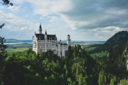
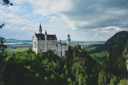
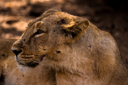
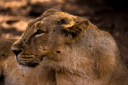
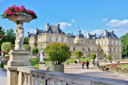
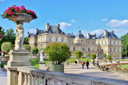
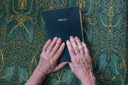
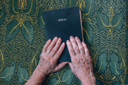

In [ ]:
ds, info = tfds.load('Div2k', split='train', with_info=True)

tfds.as_dataframe(ds.take(4), info)

# Validation Dataset

,hr,lr
0,,
1,,
2,,
3,,

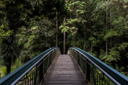
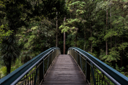
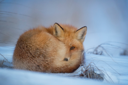
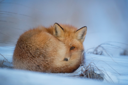
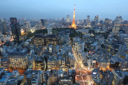
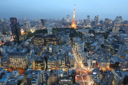
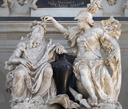
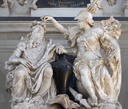

In [ ]:
ds_test, info_test = tfds.load('Div2k', split='validation', with_info=True)

tfds.as_dataframe(ds_test.take(4), info_test)

In [ ]:
ds_test = tfds.load('Div2k', split='validation', as_supervised=True)
ds = ds_test.take(1)

for lr, hr in ds:  # example is (image, label)
  print('Low resolution image shape is ==>',lr.shape)
  print('High resolution image shape is ==>',hr.shape)

Low resolution image shape is ==> (678, 1020, 3)
High resolution image shape is ==> (1356, 2040, 3)


## Access the dataset metadata

All builders include a `tfds.core.DatasetInfo` object containing the dataset metadata.

It can be accessed through:

*   The `tfds.load` API:

In [ ]:
info_test

tfds.core.DatasetInfo(
    name='div2k',
    version=2.0.0,
    description='DIV2K dataset: DIVerse 2K resolution high quality images as used for the challenges @ NTIRE (CVPR 2017 and CVPR 2018) and @ PIRM (ECCV 2018)',
    homepage='https://data.vision.ee.ethz.ch/cvl/DIV2K/',
    features=FeaturesDict({
        'hr': Image(shape=(None, None, 3), dtype=tf.uint8),
        'lr': Image(shape=(None, None, 3), dtype=tf.uint8),
    }),
    total_num_examples=900,
    splits={
        'train': 800,
        'validation': 100,
    },
    supervised_keys=('lr', 'hr'),
    citation="""@InProceedings{Agustsson_2017_CVPR_Workshops,
    	author = {Agustsson, Eirikur and Timofte, Radu},
    	title = {NTIRE 2017 Challenge on Single Image Super-Resolution: Dataset and Study},
    	booktitle = {The IEEE Conference on Computer Vision and Pattern Recognition (CVPR) Workshops},
        url = "http://www.vision.ee.ethz.ch/~timofter/publications/Agustsson-CVPRW-2017.pdf",
    	month = {July},
    	year = {20

In [ ]:
print(info_test.features.shape)
print(info_test.features.dtype)

{'lr': (None, None, 3), 'hr': (None, None, 3)}
{'lr': tf.uint8, 'hr': tf.uint8}


### Split metadata (e.g. split names, number of examples,...)

Access the `tfds.core.SplitDict`:

In [ ]:
print('Dataset Info ==> ',info.splits)

Dataset Info ==>  {'train': <tfds.core.SplitInfo num_examples=800>, 'validation': <tfds.core.SplitInfo num_examples=100>}


Available splits:

In [ ]:
print(list(info_test.splits.keys()))

['train', 'validation']


Get info on individual split:

In [ ]:
print('Number of train examples ==> ',info_test.splits['train'].num_examples)
print('train filenames ==> ',info_test.splits['train'].filenames)
print('Number of shards in train ==> ',info_test.splits['train'].num_shards)

Number of train examples ==>  800
filenames ==>  ['div2k-train.tfrecord-00000-of-00064', 'div2k-train.tfrecord-00001-of-00064', 'div2k-train.tfrecord-00002-of-00064', 'div2k-train.tfrecord-00003-of-00064', 'div2k-train.tfrecord-00004-of-00064', 'div2k-train.tfrecord-00005-of-00064', 'div2k-train.tfrecord-00006-of-00064', 'div2k-train.tfrecord-00007-of-00064', 'div2k-train.tfrecord-00008-of-00064', 'div2k-train.tfrecord-00009-of-00064', 'div2k-train.tfrecord-00010-of-00064', 'div2k-train.tfrecord-00011-of-00064', 'div2k-train.tfrecord-00012-of-00064', 'div2k-train.tfrecord-00013-of-00064', 'div2k-train.tfrecord-00014-of-00064', 'div2k-train.tfrecord-00015-of-00064', 'div2k-train.tfrecord-00016-of-00064', 'div2k-train.tfrecord-00017-of-00064', 'div2k-train.tfrecord-00018-of-00064', 'div2k-train.tfrecord-00019-of-00064', 'div2k-train.tfrecord-00020-of-00064', 'div2k-train.tfrecord-00021-of-00064', 'div2k-train.tfrecord-00022-of-00064', 'div2k-train.tfrecord-00023-of-00064', 'div2k-train.t

In [ ]:
print('Number of validation examples ==> ',info_test.splits['validation'].num_examples)
print('validation filenames ==> ',info_test.splits['validation'].filenames)
print('Number of shards in validation ==> ',info_test.splits['validation'].num_shards)

Number of validation examples ==>  100
validation filenames ==>  ['div2k-validation.tfrecord-00000-of-00008', 'div2k-validation.tfrecord-00001-of-00008', 'div2k-validation.tfrecord-00002-of-00008', 'div2k-validation.tfrecord-00003-of-00008', 'div2k-validation.tfrecord-00004-of-00008', 'div2k-validation.tfrecord-00005-of-00008', 'div2k-validation.tfrecord-00006-of-00008', 'div2k-validation.tfrecord-00007-of-00008']
Number of shards in validation ==>  8
